# Phase Flip Error Correction Implementation
This is an implementation of the phase flip algorithm for correcting a phase flip error in a quantum circuit.

## Step 0 - Imports

In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator


## Step 1 - Initialise Circuit
We start with a 3-qubit register and add a classical bit to measure.

In [9]:
circuit = QuantumCircuit(3, 1)

## Step 2 - Apply CNOT
Transfer state of qubit 1 (control) to the ancillary qubits (targets). This is in preparation for simulating a phase flip error that we will correct.

In [10]:
circuit.cx(0, 1)
circuit.cx(0, 2)

## Step 3 - Create Superpositions
Applying hadamard gates to all qubits puts them in superpositions

In [11]:
circuit.h(0)
circuit.h(1)
circuit.h(2)
circuit.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(3, 'q'), 0), Qubit(QuantumRegister(3, 'q'), 1), Qubit(QuantumRegister(3, 'q'), 2)), clbits=())

## Step 4 - Simulate a Phase Flip Error
We manually flip a phase (with a Z gate) to simulate a random flip caused by qubit instability.

In [12]:
circuit.z(0)
circuit.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(3, 'q'), 0), Qubit(QuantumRegister(3, 'q'), 1), Qubit(QuantumRegister(3, 'q'), 2)), clbits=())

## Step 5 - Reverse the Superposition
Here we reapply CNOTs to reverse the superposition of the qubits. We also apply CNOTs again to get error syndrome.

In [13]:
circuit.h(0)
circuit.h(1)
circuit.h(2)

circuit.cx(0, 1)
circuit.cx(0, 2)

## Step 6 - Apply Toffoli Gate
We apply the Toffoli/controlled-controlled-X gate to correct the error that we detected in step 5.

In [14]:
circuit.ccx(2, 1, 0)

## Step 6 - Measure and Draw

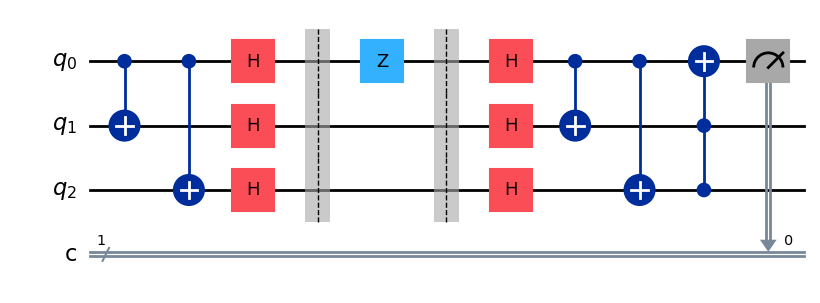

In [15]:
circuit.measure(0,0)
circuit.draw('mpl')

## Step 7 - Run or Simulate
We can easily simulate this (running requires access to IBM quantum computers).

In [16]:
simulator = AerSimulator()
circuit = transpile(circuit, simulator)

result = simulator.run(circuit).result()
counts = result.get_counts(circuit)

print(counts)

{'0': 1024}
